# New Section

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('lingSpam.csv')

In [3]:
df.sample(5)

,Unnamed: 0,Body,Label
1816,1816,Subject: pidgins and creoles\n \n new releases...,0
262,262,Subject: family name history\n \n discover you...,1
2584,2584,Subject: books on terminology\n \n john benjam...,0
3,3,Subject: email 57 million people for $ 99\n \n...,1
2152,2152,Subject: a minimalist approach to intrasentent...,0


In [4]:
df.shape

(2605, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.sample(5)

,Body,Label
889,Subject: multiple etymological sources in one ...,0
1516,Subject: lexicographer\n \n us-pa - pittsburgh...,0
1592,Subject: comparatives\n \n summary : intensifi...,0
1225,Subject: grants - in-aid available\n \n five $...,0
1201,"Subject: \n \n discourse levinsohn , stephen h...",0


In [8]:
df.rename(columns={'Body':'text','Label':'target'},inplace=True)

In [9]:
df.sample(5)

,text,target
1712,Subject: apocryphal american structuralist ass...,0
523,Subject: what language is this ?\n \n the toro...,0
1224,Subject: workshop announcement articulatory da...,0
1813,Subject: esslli workshop : lexical semantics i...,0
868,Subject: computers and teaching in the humanit...,0


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
encoder.fit_transform(df['target'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
df.head()

,text,target
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [13]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [14]:
df=df.fillna('')
df.isnull().sum()

text      0
target    0
dtype: int64

In [15]:
df.duplicated().sum()

14

In [16]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [17]:
df.shape

(2591, 2)

In [18]:
df.head()

,text,target
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [19]:
df['target'].value_counts()

target
0    2168
1     423
Name: count, dtype: int64

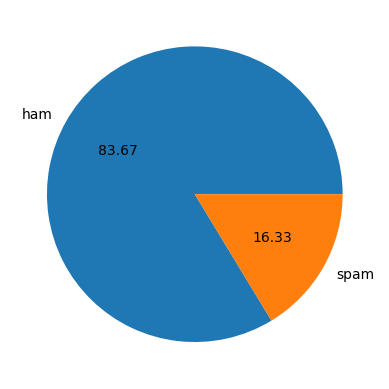

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
#df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAJARSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,text,target,num_characters,num_words
0,Subject: great part-time or summer job !\n \n ...,1,1836,583
1,Subject: auto insurance rates too high ?\n \n ...,1,1252,256
2,Subject: do want the best and economical hunti...,1,684,155
3,Subject: email 57 million people for $ 99\n \n...,1,5234,1377
4,Subject: do n't miss these !\n \n attention ! ...,1,6652,1733


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Subject: great part-time or summer job !\n \n ...,1,1836,583,18
1,Subject: auto insurance rates too high ?\n \n ...,1,1252,256,14
2,Subject: do want the best and economical hunti...,1,684,155,16
3,Subject: email 57 million people for $ 99\n \n...,1,5234,1377,99
4,Subject: do n't miss these !\n \n attention ! ...,1,6652,1733,233


In [29]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.168000e+03,2.168000e+03,2168.000000
mean,1.102071e+04,2.301643e+03,142.967251
std,3.668927e+05,7.781081e+04,4794.289355
min,4.900000e+01,1.000000e+01,1.000000
25%,1.056500e+03,2.077500e+02,11.000000
50%,2.061000e+03,3.960000e+02,20.000000
75%,3.876750e+03,7.872500e+02,41.000000
max,1.708563e+07,3.623500e+06,223247.000000


In [30]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,423.000000,423.000000,423.000000
mean,3784.697400,908.664303,62.002364
std,5206.682932,1258.498140,86.111068
min,96.000000,25.000000,1.000000
25%,658.000000,144.000000,12.500000
50%,1715.000000,399.000000,27.000000
75%,4797.000000,1153.500000,71.500000
max,28639.000000,6604.000000,469.000000


In [31]:
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJARSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
transform_text(df['text'][0])

'subject great summer job display box credit applic need place small store area 1 introduc store owner manag 2 use 90 effect script tell littl display box save custom hundr dollar draw card busi make 5 00 15 00 everi app sent 3 find good spot counter place box say noth need done need name address compani send commiss check compensa 10 everi box place becom repres could also earn commiss 10 applic came store cours much profit plan pay month year small effort call code 3 24 hour receiv detail remov mail list type b2998 hotmail com area remov subject area new e mail send'

In [35]:
#df['text'].apply(transform_text)

In [36]:
df['transformed_text']=df['text'].apply(transform_text)

In [37]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: great part-time or summer job !\n \n ...,1,1836,583,18,subject great summer job display box credit ap...
1,Subject: auto insurance rates too high ?\n \n ...,1,1252,256,14,subject auto insur rate high dear nlpeopl sure...
2,Subject: do want the best and economical hunti...,1,684,155,16,subject want best econom hunt vacat life want ...
3,Subject: email 57 million people for $ 99\n \n...,1,5234,1377,99,subject email 57 million peopl 99 57 million e...
4,Subject: do n't miss these !\n \n attention ! ...,1,6652,1733,233,subject miss attent warn adult warn adult 21 y...


In [100]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features= 35000)
tfidf=TfidfVectorizer()

In [101]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [102]:
X.shape

(2591, 35000)

In [103]:
y=df['target'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [107]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8362235067437379
[[378  57]
 [ 28  56]]
0.49557522123893805


In [109]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9922928709055877
[[434   1]
 [  3  81]]
0.9878048780487805


In [118]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9576107899807321
[[435   0]
 [ 22  62]]
1.0


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [120]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [121]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'RF': rfc,
    'ETC': etc,
}

In [122]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [123]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7938342967244701
Precision -  0.3283582089552239
For  NB
Accuracy -  0.9922928709055877
Precision -  0.9878048780487805
For  RF
Accuracy -  0.9884393063583815
Precision -  1.0
For  ETC
Accuracy -  0.9903660886319846
Precision -  1.0


In [124]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [125]:
performance_df

,Algorithm,Accuracy,Precision
2,RF,0.988439,1.000000
3,ETC,0.990366,1.000000
1,NB,0.992293,0.987805
0,SVC,0.793834,0.328358


In [126]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [127]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.988439
1,ETC,Accuracy,0.990366
2,NB,Accuracy,0.992293
3,SVC,Accuracy,0.793834
4,RF,Precision,1.000000
5,ETC,Precision,1.000000
6,NB,Precision,0.987805
7,SVC,Precision,0.328358


C:\Users\RAJARSHI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


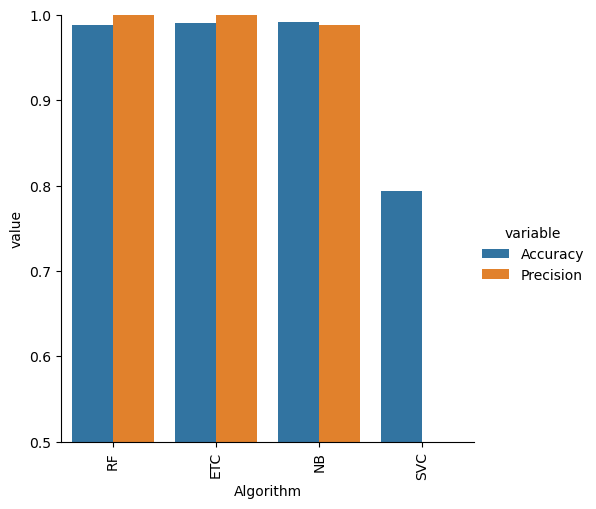

In [128]:
import seaborn as sns
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [129]:
# Voting Classifier
#svc = SVC(kernel='sigmoid', gamma=1.25)
#mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators=175, random_state=2)
#lrc = LogisticRegression(solver='liblinear', penalty='l1')

##from sklearn.ensemble import VotingClassifier

In [130]:
#voting = VotingClassifier(estimators=[('sv', svc), ('nb', mnb), ('et', etc)],voting='hard')

In [131]:
#voting.fit(X_train,y_train)

In [132]:
#y_pred_voting = voting.predict(X_test)
#print("Accuracy: ",accuracy_score(y_test,y_pred_voting))
#print("Precision: ",precision_score(y_test,y_pred_voting))
#print(confusion_matrix(y_test,y_pred_voting))

In [133]:
#df['text'][3862]

In [134]:
email = transform_text("Hey, how are you doing. We should definitely go out sometimes")

In [135]:
vector_email = cv.transform([email]).toarray()

In [187]:
result = mnb.predict(vector_email)

In [188]:
result

array([0], dtype=int64)

In [193]:
email1 = transform_text("Sir/Madam, I am an appearing candidate for the upcoming exam on 'Programming In Java' course. I have already registered for the exam in due time and my payment is completed as well. Today I received the email to download the hall ticket for the exam on 29th October, 2023. But unfortunately, I couldn't download the hall ticket. The given link is not working properly. I request you to please look into the matter seriously and fix the problem as soon as possible. I'll be very grateful to you for your support. Thanking you, Rajarshi Bangal")

In [194]:
vector_email1 = cv.transform([email1]).toarray()

In [195]:
result1 = mnb.predict(vector_email1)

In [196]:
result1

array([0], dtype=int64)

In [197]:
import pickle
pickle.dump(cv, open('email_vectorizer.pkl','wb'))
pickle.dump(mnb, open('email_model.pkl','wb'))